In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
df = pd.read_csv("D:VOF.L.csv",index_col = "Date",parse_dates = True)

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,272.0,275.000000,272.000000,273.25,233.939148,170046
2017-01-04,272.0,275.000000,272.000000,272.75,233.511093,107823
2017-01-05,272.0,274.500000,270.250000,272.50,233.297043,391623
2017-01-06,272.5,273.750000,266.000000,273.00,233.725098,464329
2017-01-09,273.0,273.500000,270.000000,273.50,234.153183,276108
...,...,...,...,...,...,...
2022-03-25,502.0,507.000000,502.000000,507.00,493.078217,265108
2022-03-28,502.0,511.000000,502.000000,506.00,492.105652,115303
2022-03-29,502.0,520.000000,500.000000,518.00,503.776154,149574


In [4]:
def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

Text(0.5, 1.0, 'VNC stock closing price')

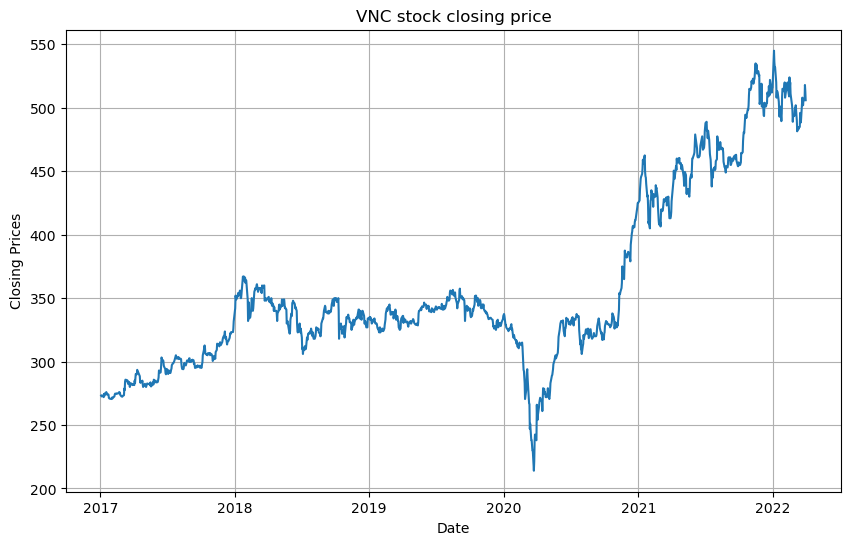

In [5]:
df_close = df['Close']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(df_close)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('VNC stock closing price')

In [6]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Flatten
from keras.layers import ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
dataset = df.values
sc = MinMaxScaler(feature_range = (0,1))
data_scaled = sc.fit_transform(dataset)

In [8]:
close_prices = df['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.9)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [10]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
1136/1136 [==============================] - 33s 26ms/step - loss: 0.0018
Epoch 2/3
1136/1136 [==============================] - 28s 25ms/step - loss: 6.8905e-04
Epoch 3/3
1136/1136 [==============================] - 27s 24ms/step - loss: 4.6380e-04


In [13]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

5/5 [==============================] - 1s 25ms/step


ValueError: non-broadcastable output operand with shape (132,1) doesn't match the broadcast shape (132,6)

In [14]:
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)
#MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE: ", mape)

RMSE:  502.6273703580547
MAPE:  99.82783378029261


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20040\883257517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_['Predictions'] = predictions


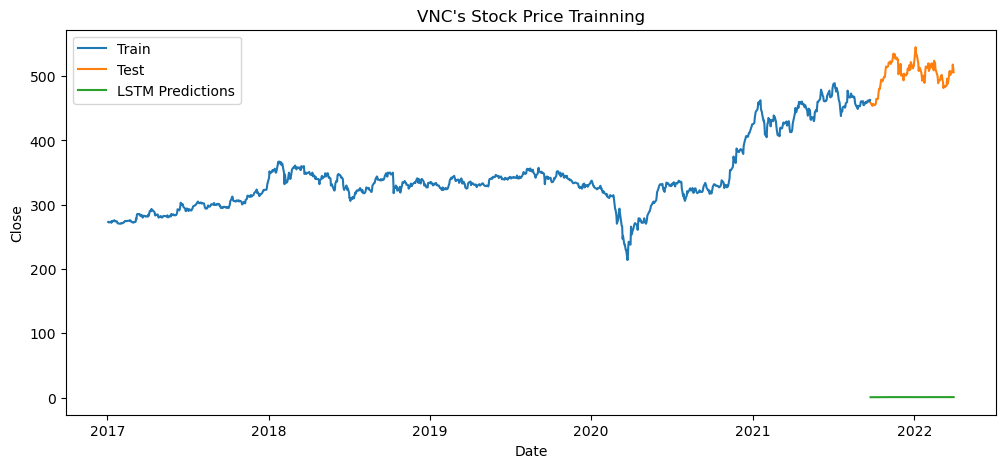

In [15]:
#Plot the data
train_ = df[:training_data_len]
test_ =  df[training_data_len:]
test_['Predictions'] = predictions
#Visualisze the data
plt.figure(figsize = (12,5))
plt.title("VNC's Stock Price Trainning")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(train_['Close'])
plt.plot(test_[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'LSTM Predictions'], loc = 'upper left')
plt.show()